<a href="https://colab.research.google.com/github/slmsshk/Deep-Learning-in-Python/blob/master/Convolutional_Neural_Network_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1 id="2a13" class="pw-post-title iy iz ja bn jb jc jd je jf jg jh ji jj jk jl jm jn jo jp jq jr js jt ju jv jw gc" data-selectable-paragraph="">Convolutional Neural Network </h1>

<ul>
<li><a href="https://keras.io/api/layers/convolution_layers/convolution1d">Conv1D layer</a></li>
<li><a href="https://keras.io/api/layers/convolution_layers/convolution2d">Conv2D layer</a></li>
<li><a href="https://keras.io/api/layers/convolution_layers/convolution3d">Conv3D layer</a></li>
<li><a href="https://keras.io/api/layers/convolution_layers/separable_convolution1d">SeparableConv1D layer</a></li>
<li><a href="https://keras.io/api/layers/convolution_layers/separable_convolution2d">SeparableConv2D layer</a></li>
<li><a href="https://keras.io/api/layers/convolution_layers/depthwise_convolution2d">DepthwiseConv2D layer</a></li>
<li><a href="https://keras.io/api/layers/convolution_layers/convolution1d_transpose">Conv1DTranspose layer</a></li>
<li><a href="https://keras.io/api/layers/convolution_layers/convolution2d_transpose">Conv2DTranspose layer</a></li>
<li><a href="https://keras.io/api/layers/convolution_layers/convolution3d_transpose">Conv3DTranspose layer</a></li>
</ul>

In [10]:
# Necessary Imports
from tensorflow import keras
from keras.layers import Dense,Conv2D,Dense,MaxPool2D,Flatten
from keras.datasets import fashion_mnist
from keras.models import Sequential

import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical

In [3]:
# Check Keras layer class
dir(keras.layers)

['AbstractRNNCell',
 'Activation',
 'ActivityRegularization',
 'Add',
 'AdditiveAttention',
 'AlphaDropout',
 'Attention',
 'Average',
 'AveragePooling1D',
 'AveragePooling2D',
 'AveragePooling3D',
 'AvgPool1D',
 'AvgPool2D',
 'AvgPool3D',
 'BatchNormalization',
 'Bidirectional',
 'CategoryEncoding',
 'CenterCrop',
 'Concatenate',
 'Conv1D',
 'Conv1DTranspose',
 'Conv2D',
 'Conv2DTranspose',
 'Conv3D',
 'Conv3DTranspose',
 'ConvLSTM1D',
 'ConvLSTM2D',
 'ConvLSTM3D',
 'Convolution1D',
 'Convolution1DTranspose',
 'Convolution2D',
 'Convolution2DTranspose',
 'Convolution3D',
 'Convolution3DTranspose',
 'Cropping1D',
 'Cropping2D',
 'Cropping3D',
 'Dense',
 'DenseFeatures',
 'DepthwiseConv1D',
 'DepthwiseConv2D',
 'Discretization',
 'Dot',
 'Dropout',
 'ELU',
 'Embedding',
 'Flatten',
 'GRU',
 'GRUCell',
 'GaussianDropout',
 'GaussianNoise',
 'GlobalAveragePooling1D',
 'GlobalAveragePooling2D',
 'GlobalAveragePooling3D',
 'GlobalAvgPool1D',
 'GlobalAvgPool2D',
 'GlobalAvgPool3D',
 'GlobalM

In [ ]:
# Help on fashion_mnist dataset
help(fashion_mnist)

In [5]:
# Load Dataset
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [6]:
# data 
print(f'x_train:\nx_train.shape:{x_train.shape}\nx_train.dtype:{x_train.dtype} \nx_train.ndim {x_train.ndim}')
print(f'\ny_train:\ny_train.shape:{y_train.shape}\ny_train.dtype:{y_train.dtype} \ny_train.ndim {y_train.ndim}')


x_train:
x_train.shape:(60000, 28, 28)
x_train.dtype:uint8 
x_train.ndim 3

y_train:
y_train.shape:(60000,)
y_train.dtype:uint8 
y_train.ndim 1


In [7]:
X_train=(x_train.reshape(60000, 28, 28,1)/255).astype('float32')
plt_x=x_train/255

In [8]:
print(f'x_train:\nx_train.shape:{X_train.shape}\nx_train.dtype:{X_train.dtype} \nx_train.ndim {X_train.ndim}')


x_train:
x_train.shape:(60000, 28, 28, 1)
x_train.dtype:float32 
x_train.ndim 4


In [11]:
# Changing the class variable to categorical
Y_train=to_categorical(y_train,dtype='float32')

In [ ]:
# imshow(x_train[0])
help(plt.subplot)

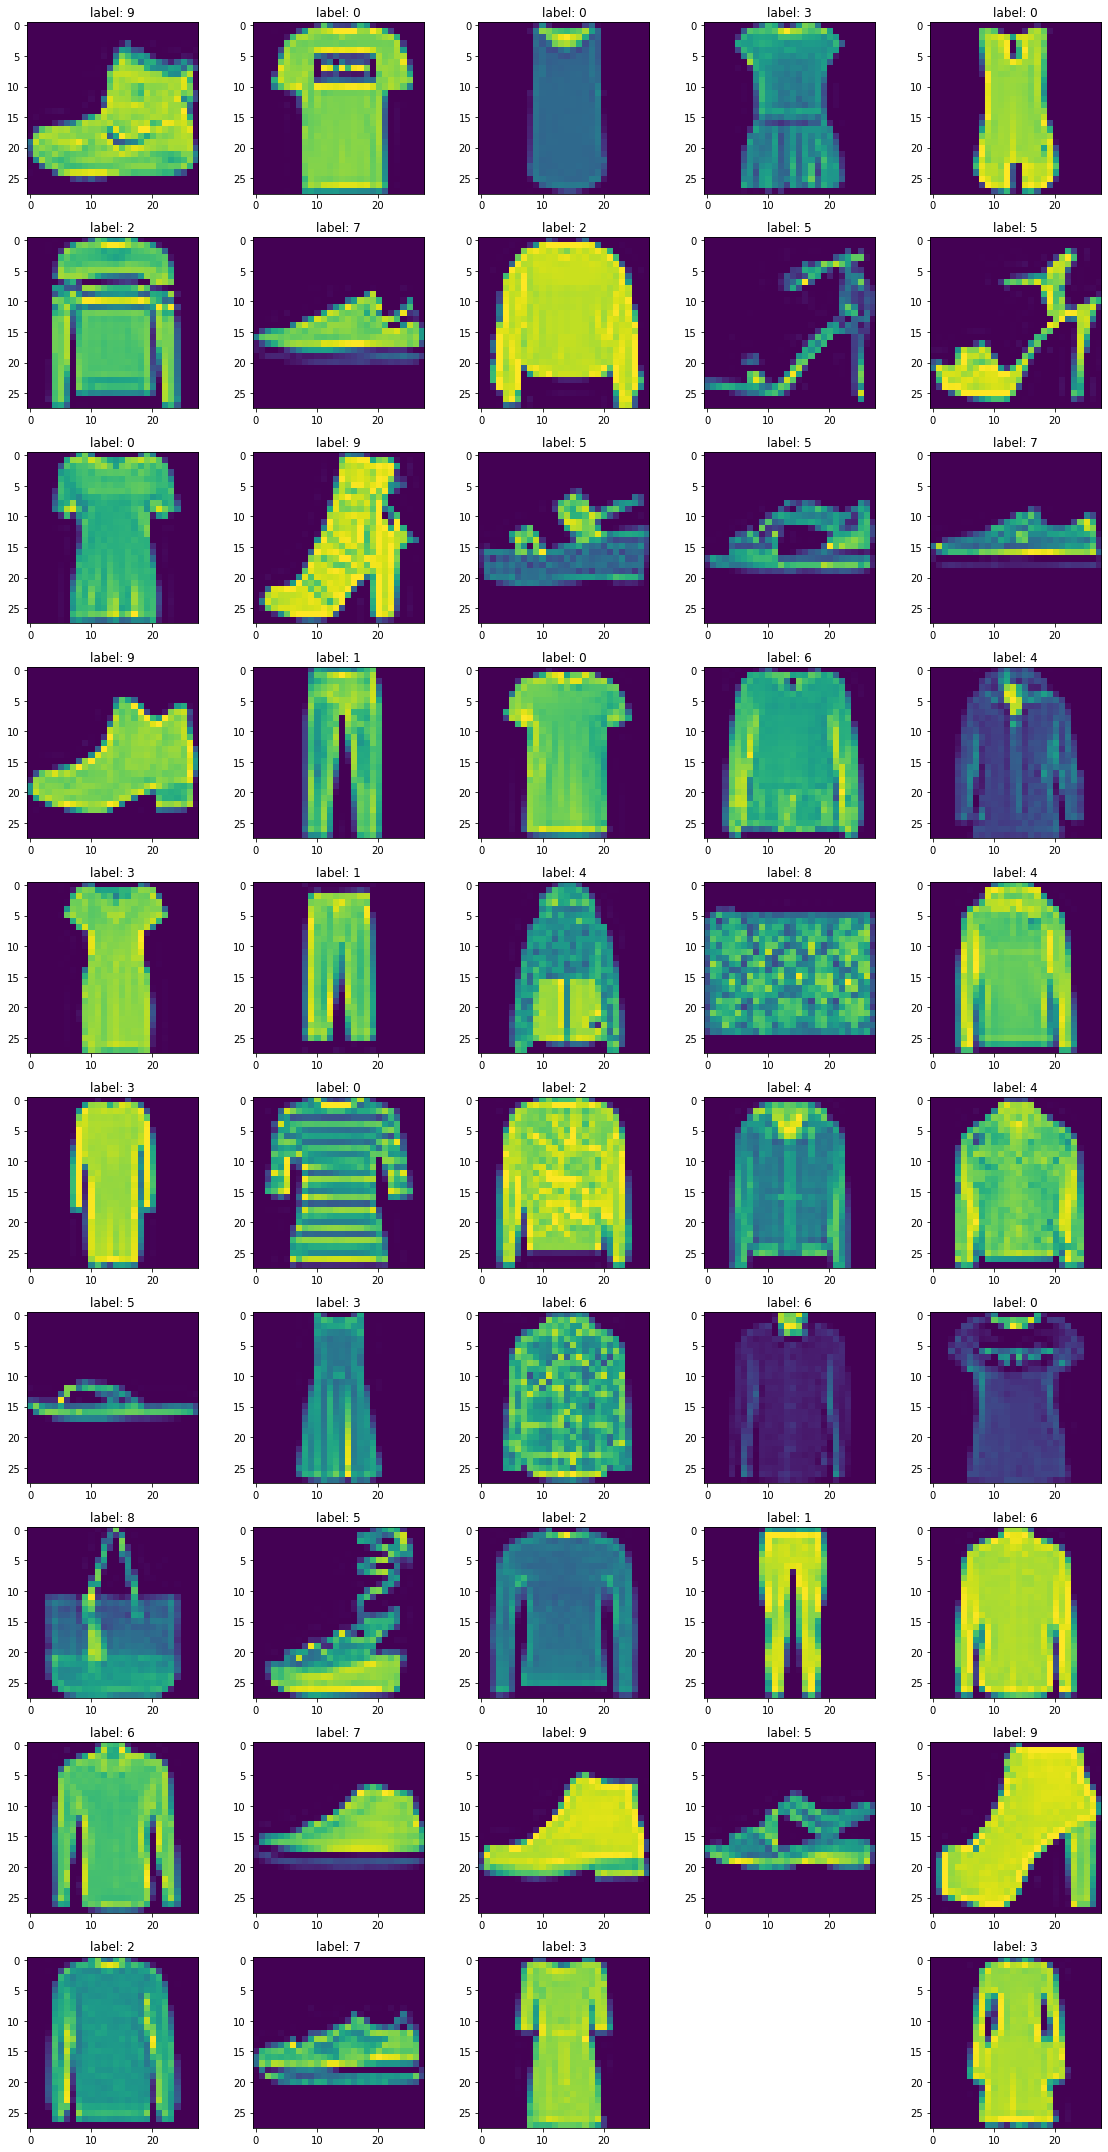

In [9]:
# Plot first 100 images
plt.figure(figsize=(16,30))
for i in range(50):
  plt.subplot(10,5,i+1)
  plt.imshow(x_train[i])
  plt.title(f'label: {y_train[i]}')
  plt.tight_layout()


<h1 id="conv2d-layer">Conv2D layer</h1>
<h3 id="conv2d-class"><code>Conv2D</code> class</h3>
<div class="codehilite"><pre><span></span><code><span class="n">tf</span><span class="o">.</span><span class="n">keras</span><span class="o">.</span><span class="n">layers</span><span class="o">.</span><span class="n">Conv2D</span><span class="p">(</span>
    <span class="n">filters</span><span class="p">,</span>
    <span class="n">kernel_size</span><span class="p">,</span>
    <span class="n">strides</span><span class="o">=</span><span class="p">(</span><span class="mi">1</span><span class="p">,</span> <span class="mi">1</span><span class="p">),</span>
    <span class="n">padding</span><span class="o">=</span><span class="s2">"valid"</span><span class="p">,</span>
    <span class="n">data_format</span><span class="o">=</span><span class="bp">None</span><span class="p">,</span>
    <span class="n">dilation_rate</span><span class="o">=</span><span class="p">(</span><span class="mi">1</span><span class="p">,</span> <span class="mi">1</span><span class="p">),</span>
    <span class="n">groups</span><span class="o">=</span><span class="mi">1</span><span class="p">,</span>
    <span class="n">activation</span><span class="o">=</span><span class="bp">None</span><span class="p">,</span>
    <span class="n">use_bias</span><span class="o">=</span><span class="bp">True</span><span class="p">,</span>
    <span class="n">kernel_initializer</span><span class="o">=</span><span class="s2">"glorot_uniform"</span><span class="p">,</span>
    <span class="n">bias_initializer</span><span class="o">=</span><span class="s2">"zeros"</span><span class="p">,</span>
    <span class="n">kernel_regularizer</span><span class="o">=</span><span class="bp">None</span><span class="p">,</span>
    <span class="n">bias_regularizer</span><span class="o">=</span><span class="bp">None</span><span class="p">,</span>
    <span class="n">activity_regularizer</span><span class="o">=</span><span class="bp">None</span><span class="p">,</span>
    <span class="n">kernel_constraint</span><span class="o">=</span><span class="bp">None</span><span class="p">,</span>
    <span class="n">bias_constraint</span><span class="o">=</span><span class="bp">None</span><span class="p">,</span>
    <span class="o">**</span><span class="n">kwargs</span>
<span class="p">)</span>
</code></pre></div>
<p>This layer creates a convolution kernel that is convolved
with the layer input to produce a tensor of
outputs.</p>
<p><strong>Examples</strong></p>
<div class="codehilite"><pre><span></span><code><span class="o">&gt;&gt;&gt;</span> <span class="c1"># The inputs are 28x28 RGB images with `channels_last` and the batch</span>
<span class="o">&gt;&gt;&gt;</span> <span class="c1"># size is 4.</span>
<span class="o">&gt;&gt;&gt;</span> <span class="n">input_shape</span> <span class="o">=</span> <span class="p">(</span><span class="mi">4</span><span class="p">,</span> <span class="mi">28</span><span class="p">,</span> <span class="mi">28</span><span class="p">,</span> <span class="mi">3</span><span class="p">)</span>
<span class="o">&gt;&gt;&gt;</span> <span class="n">x</span> <span class="o">=</span> <span class="n">tf</span><span class="o">.</span><span class="n">random</span><span class="o">.</span><span class="n">normal</span><span class="p">(</span><span class="n">input_shape</span><span class="p">)</span>
<span class="o">&gt;&gt;&gt;</span> <span class="n">y</span> <span class="o">=</span> <span class="n">tf</span><span class="o">.</span><span class="n">keras</span><span class="o">.</span><span class="n">layers</span><span class="o">.</span><span class="n">Conv2D</span><span class="p">(</span>
<span class="o">...</span> <span class="mi">2</span><span class="p">,</span> <span class="mi">3</span><span class="p">,</span> <span class="n">activation</span><span class="o">=</span><span class="s1">'relu'</span><span class="p">,</span> <span class="n">input_shape</span><span class="o">=</span><span class="n">input_shape</span><span class="p">[</span><span class="mi">1</span><span class="p">:])(</span><span class="n">x</span><span class="p">)</span>
<span class="o">&gt;&gt;&gt;</span> <span class="k">print</span><span class="p">(</span><span class="n">y</span><span class="o">.</span><span class="n">shape</span><span class="p">)</span>
<span class="p">(</span><span class="mi">4</span><span class="p">,</span> <span class="mi">26</span><span class="p">,</span> <span class="mi">26</span><span class="p">,</span> <span class="mi">2</span><span class="p">)</span>
</code></pre></div>
<div class="codehilite"><pre><span></span><code><span class="o">&gt;&gt;&gt;</span> <span class="c1"># With `dilation_rate` as 2.</span>
<span class="o">&gt;&gt;&gt;</span> <span class="n">input_shape</span> <span class="o">=</span> <span class="p">(</span><span class="mi">4</span><span class="p">,</span> <span class="mi">28</span><span class="p">,</span> <span class="mi">28</span><span class="p">,</span> <span class="mi">3</span><span class="p">)</span>
<span class="o">&gt;&gt;&gt;</span> <span class="n">x</span> <span class="o">=</span> <span class="n">tf</span><span class="o">.</span><span class="n">random</span><span class="o">.</span><span class="n">normal</span><span class="p">(</span><span class="n">input_shape</span><span class="p">)</span>
<span class="o">&gt;&gt;&gt;</span> <span class="n">y</span> <span class="o">=</span> <span class="n">tf</span><span class="o">.</span><span class="n">keras</span><span class="o">.</span><span class="n">layers</span><span class="o">.</span><span class="n">Conv2D</span><span class="p">(</span>
<span class="o">...</span> <span class="mi">2</span><span class="p">,</span> <span class="mi">3</span><span class="p">,</span> <span class="n">activation</span><span class="o">=</span><span class="s1">'relu'</span><span class="p">,</span> <span class="n">dilation_rate</span><span class="o">=</span><span class="mi">2</span><span class="p">,</span> <span class="n">input_shape</span><span class="o">=</span><span class="n">input_shape</span><span class="p">[</span><span class="mi">1</span><span class="p">:])(</span><span class="n">x</span><span class="p">)</span>
<span class="o">&gt;&gt;&gt;</span> <span class="k">print</span><span class="p">(</span><span class="n">y</span><span class="o">.</span><span class="n">shape</span><span class="p">)</span>
<span class="p">(</span><span class="mi">4</span><span class="p">,</span> <span class="mi">24</span><span class="p">,</span> <span class="mi">24</span><span class="p">,</span> <span class="mi">2</span><span class="p">)</span>
</code></pre></div>
<div class="codehilite"><pre><span></span><code><span class="o">&gt;&gt;&gt;</span> <span class="c1"># With `padding` as "same".</span>
<span class="o">&gt;&gt;&gt;</span> <span class="n">input_shape</span> <span class="o">=</span> <span class="p">(</span><span class="mi">4</span><span class="p">,</span> <span class="mi">28</span><span class="p">,</span> <span class="mi">28</span><span class="p">,</span> <span class="mi">3</span><span class="p">)</span>
<span class="o">&gt;&gt;&gt;</span> <span class="n">x</span> <span class="o">=</span> <span class="n">tf</span><span class="o">.</span><span class="n">random</span><span class="o">.</span><span class="n">normal</span><span class="p">(</span><span class="n">input_shape</span><span class="p">)</span>
<span class="o">&gt;&gt;&gt;</span> <span class="n">y</span> <span class="o">=</span> <span class="n">tf</span><span class="o">.</span><span class="n">keras</span><span class="o">.</span><span class="n">layers</span><span class="o">.</span><span class="n">Conv2D</span><span class="p">(</span>
<span class="o">...</span> <span class="mi">2</span><span class="p">,</span> <span class="mi">3</span><span class="p">,</span> <span class="n">activation</span><span class="o">=</span><span class="s1">'relu'</span><span class="p">,</span> <span class="n">padding</span><span class="o">=</span><span class="s2">"same"</span><span class="p">,</span> <span class="n">input_shape</span><span class="o">=</span><span class="n">input_shape</span><span class="p">[</span><span class="mi">1</span><span class="p">:])(</span><span class="n">x</span><span class="p">)</span>
<span class="o">&gt;&gt;&gt;</span> <span class="k">print</span><span class="p">(</span><span class="n">y</span><span class="o">.</span><span class="n">shape</span><span class="p">)</span>
<span class="p">(</span><span class="mi">4</span><span class="p">,</span> <span class="mi">28</span><span class="p">,</span> <span class="mi">28</span><span class="p">,</span> <span class="mi">2</span><span class="p">)</span>
</code></pre></div>
<div class="codehilite"><pre><span></span><code><span class="o">&gt;&gt;&gt;</span> <span class="c1"># With extended batch shape [4, 7]:</span>
<span class="o">&gt;&gt;&gt;</span> <span class="n">input_shape</span> <span class="o">=</span> <span class="p">(</span><span class="mi">4</span><span class="p">,</span> <span class="mi">7</span><span class="p">,</span> <span class="mi">28</span><span class="p">,</span> <span class="mi">28</span><span class="p">,</span> <span class="mi">3</span><span class="p">)</span>
<span class="o">&gt;&gt;&gt;</span> <span class="n">x</span> <span class="o">=</span> <span class="n">tf</span><span class="o">.</span><span class="n">random</span><span class="o">.</span><span class="n">normal</span><span class="p">(</span><span class="n">input_shape</span><span class="p">)</span>
<span class="o">&gt;&gt;&gt;</span> <span class="n">y</span> <span class="o">=</span> <span class="n">tf</span><span class="o">.</span><span class="n">keras</span><span class="o">.</span><span class="n">layers</span><span class="o">.</span><span class="n">Conv2D</span><span class="p">(</span>
<span class="o">...</span> <span class="mi">2</span><span class="p">,</span> <span class="mi">3</span><span class="p">,</span> <span class="n">activation</span><span class="o">=</span><span class="s1">'relu'</span><span class="p">,</span> <span class="n">input_shape</span><span class="o">=</span><span class="n">input_shape</span><span class="p">[</span><span class="mi">2</span><span class="p">:])(</span><span class="n">x</span><span class="p">)</span>
<span class="o">&gt;&gt;&gt;</span> <span class="k">print</span><span class="p">(</span><span class="n">y</span><span class="o">.</span><span class="n">shape</span><span class="p">)</span>
<span class="p">(</span><span class="mi">4</span><span class="p">,</span> <span class="mi">7</span><span class="p">,</span> <span class="mi">26</span><span class="p">,</span> <span class="mi">26</span><span class="p">,</span> <span class="mi">2</span><span class="p">)</span>
</code></pre></div>

<p><strong>Arguments</strong></p>
<li><strong>filters</strong>: Integer, the dimensionality of the output space (i.e. the number of
  output filters in the convolution).</li><li><strong>kernel_size</strong>: An integer or tuple/list of 2 integers, specifying the height
  and width of the 2D convolution window. Can be a single integer to specify
  the same value for all spatial dimensions.</li><li><strong>strides</strong>: An integer or tuple/list of 2 integers, specifying the strides of
  the convolution along the height and width. Can be a single integer to
  specify the same value for all spatial dimensions. Specifying any stride
  value != 1 is incompatible with specifying any <code>dilation_rate</code> value != 1.</li><li><strong>padding</strong>: one of <code>"valid"</code> or <code>"same"</code> (case-insensitive).
  <code>"valid"</code> means no padding. <code>"same"</code> results in padding with zeros evenly
  to the left/right or up/down of the input. When <code>padding="same"</code> and
  <code>strides=1</code>, the output has the same size as the input.</li><li><strong>data_format</strong>: A string, one of <code>channels_last</code> (default) or <code>channels_first</code>.
  The ordering of the dimensions in the inputs. <code>channels_last</code> corresponds
  to inputs with shape <code>(batch_size, height, width, channels)</code> while
  <code>channels_first</code> corresponds to inputs with shape <code>(batch_size, channels,
  height, width)</code>. It defaults to the <code>image_data_format</code> value found in
  your Keras config file at <code>~/.keras/keras.json</code>. If you never set it, then
  it will be <code>channels_last</code>.</li><li><strong>activation</strong>: Activation function to use. If you don't specify anything, no
  activation is applied (see <code>keras.activations</code>).</li>
  <p><strong>Input shape</strong></p><p>4+D tensor with shape: <code>batch_shape + (channels, rows, cols)</code> if
  <code>data_format='channels_first'</code>
or 4+D tensor with shape: <code>batch_shape + (rows, cols, channels)</code> if
  <code>data_format='channels_last'</code>.</p><p><strong>Output shape</strong></p><p>4+D tensor with shape: <code>batch_shape + (filters, new_rows, new_cols)</code> if
<code>data_format='channels_first'</code> or 4+D tensor with shape: <code>batch_shape +
  (new_rows, new_cols, filters)</code> if <code>data_format='channels_last'</code>.  <code>rows</code>
  and <code>cols</code> values might have changed due to padding.</p><p><strong>Returns</strong></p><p>A tensor of rank 4+ representing
<code>activation(conv2d(inputs, kernel) + bias)</code>.</p>

In [50]:
# instantiate Models
cnn=Sequential()

In [51]:
# Model
cnn.add(Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)))
cnn.add(MaxPool2D((2,2)))
cnn.add(Conv2D(64,(3,3),activation='relu'))
cnn.add(MaxPool2D((2,2)))


In [52]:
cnn.add(Flatten())

In [ ]:
cnn.summary()

In [ ]:
'''Keras Losses'''
dir(keras.losses)

In [53]:
cnn.add(Dense(15))
cnn.add(Dense(10))

In [57]:
# Compile
cnn.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
cnn.fit(X_train,Y_train,epochs=2)

Epoch 1/2
1875/1875 [==============================] - 59s 31ms/step - loss: 10.7064 - accuracy: 0.1971
Epoch 2/2
 277/1875 [===>..........................] - ETA: 48s - loss: 11.1212 - accuracy: 0.2149